<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp 

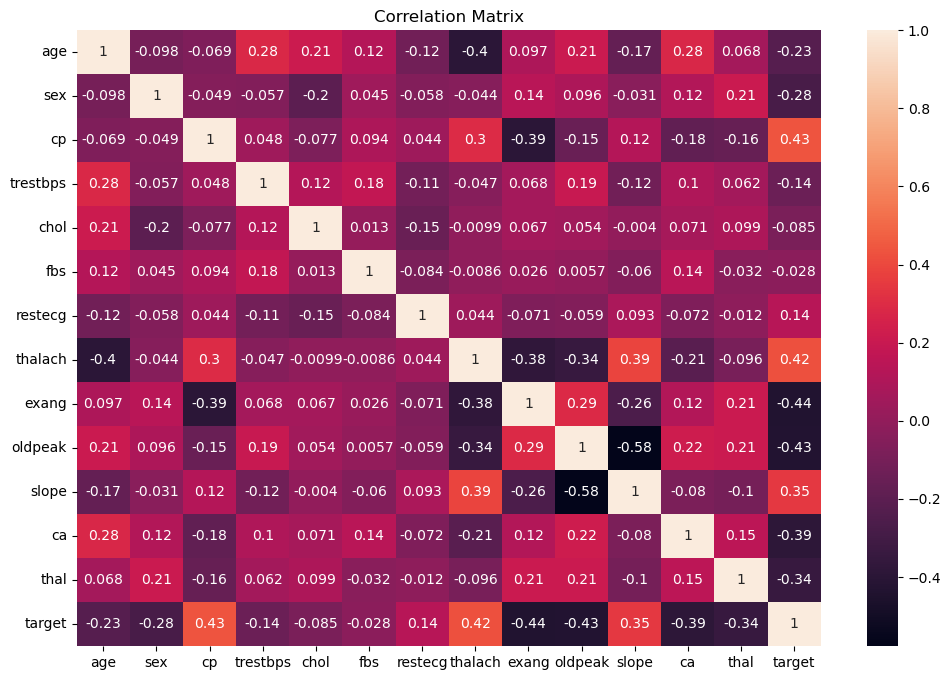

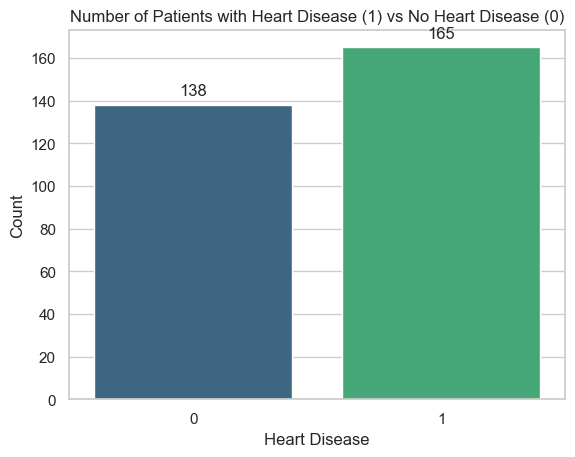

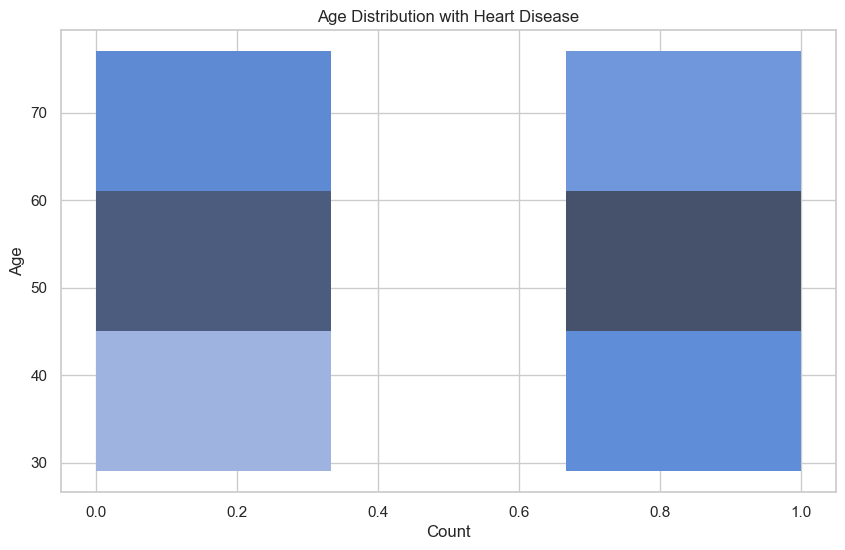

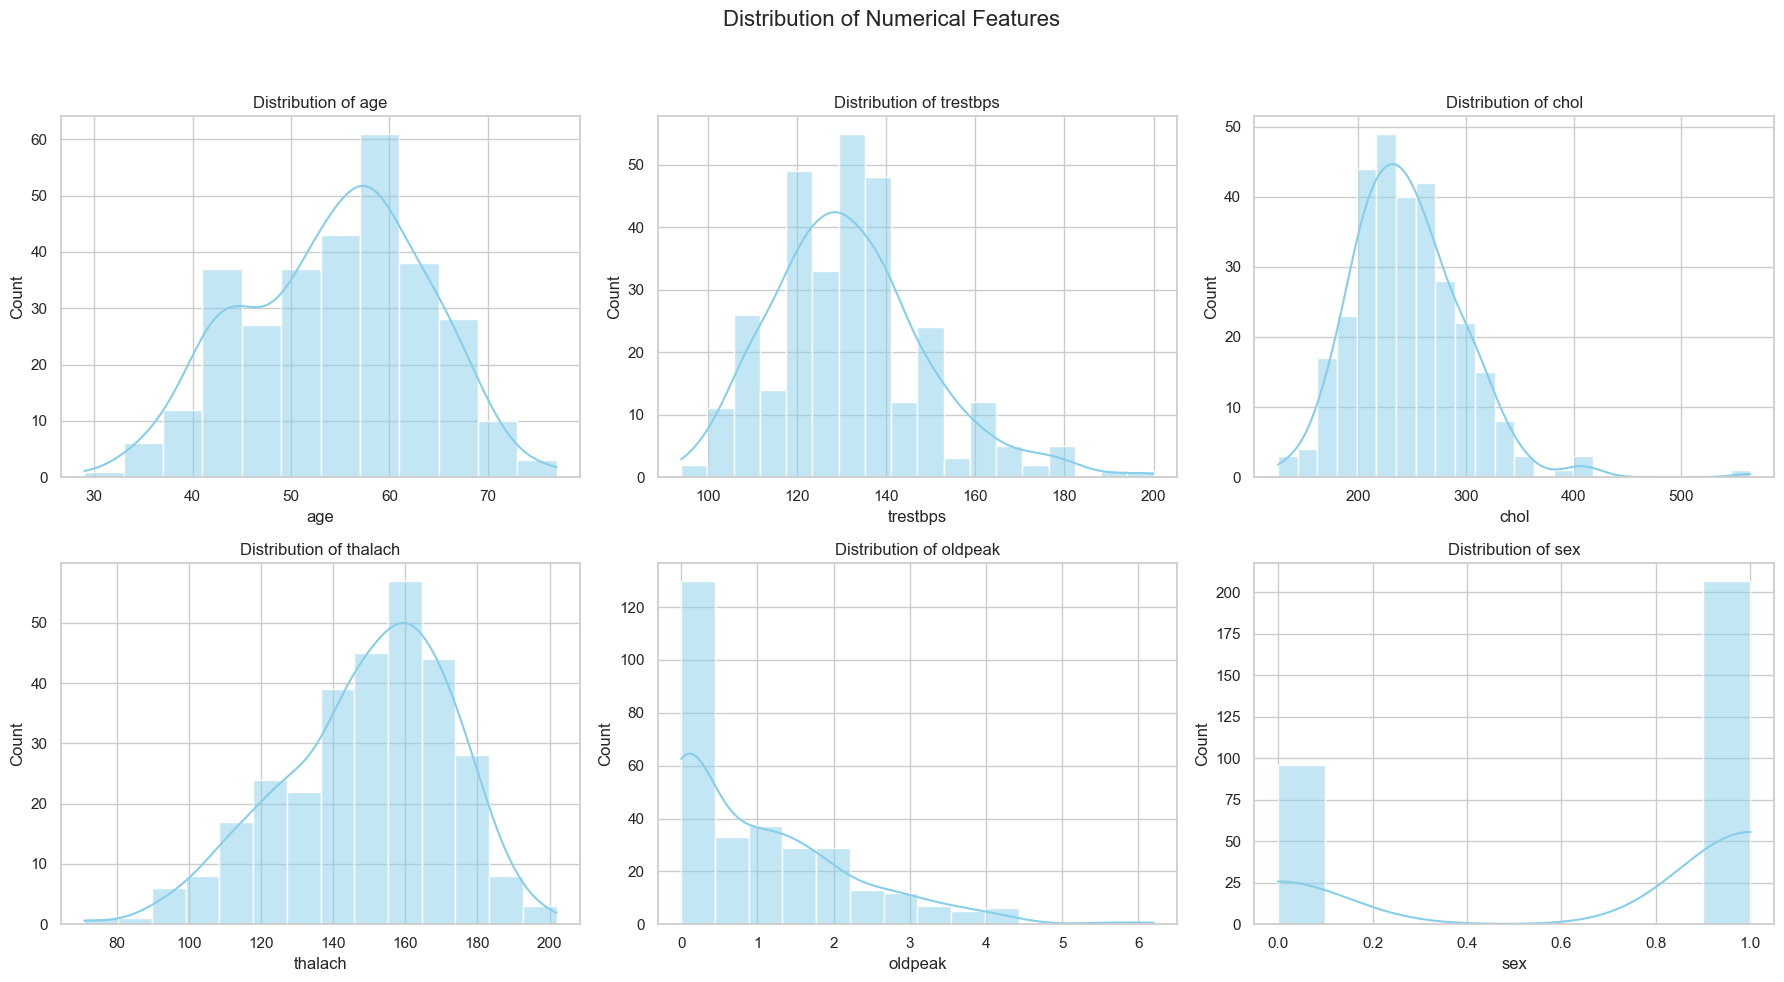

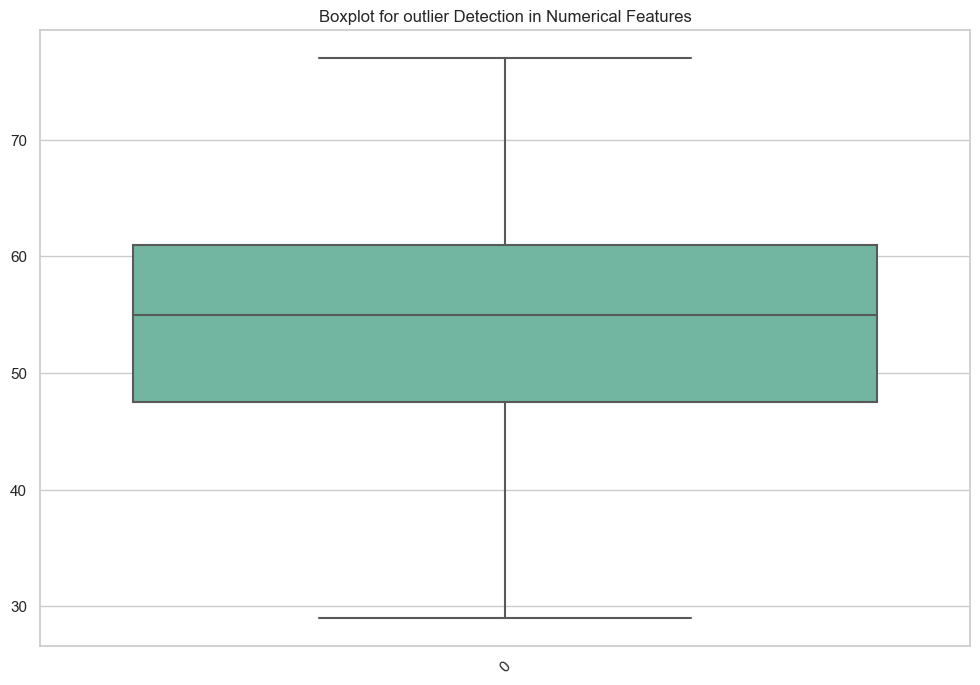

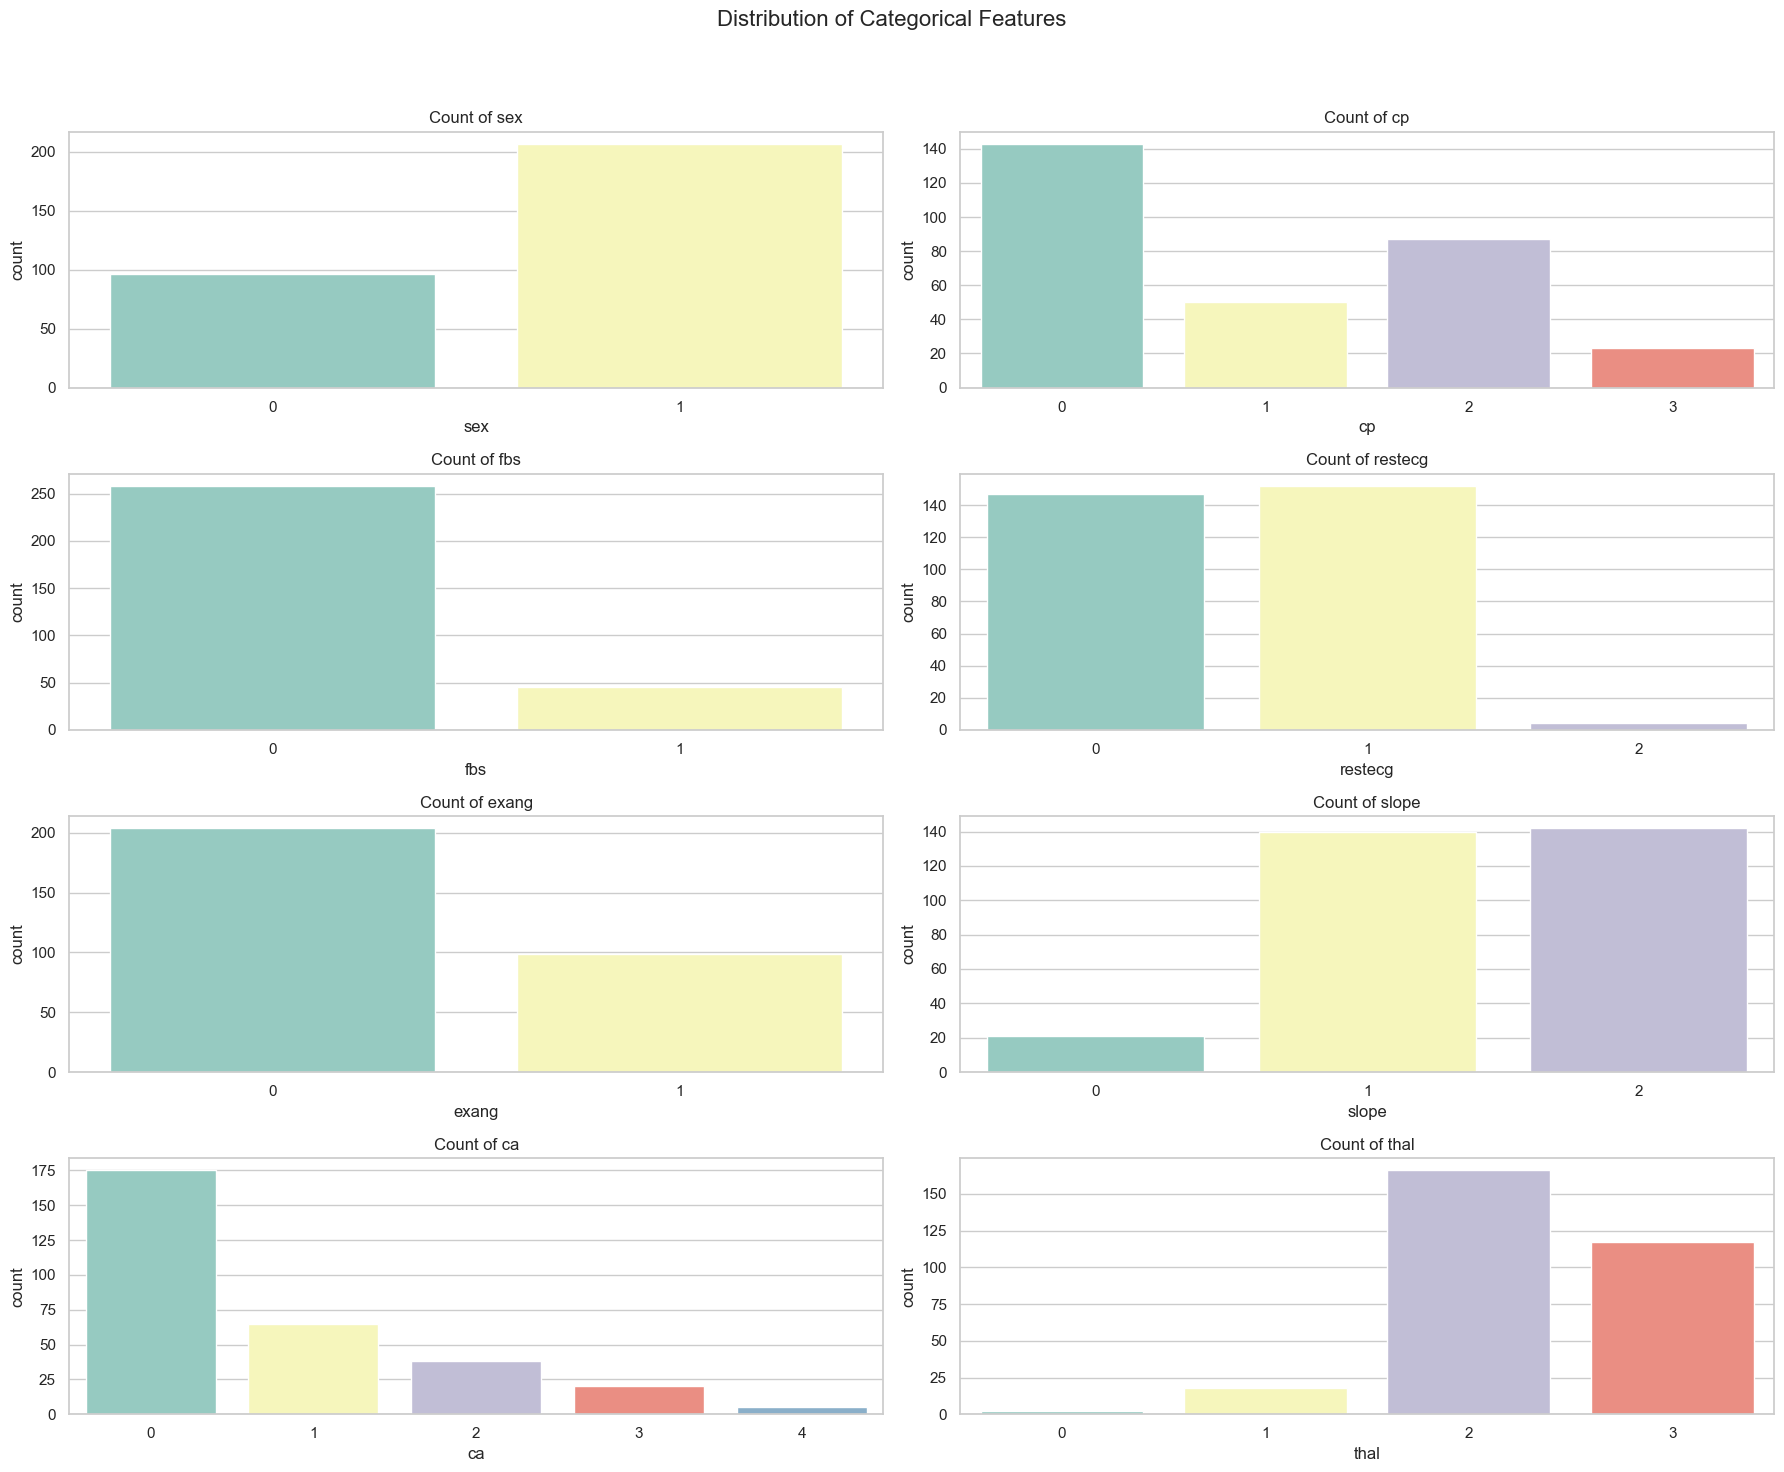

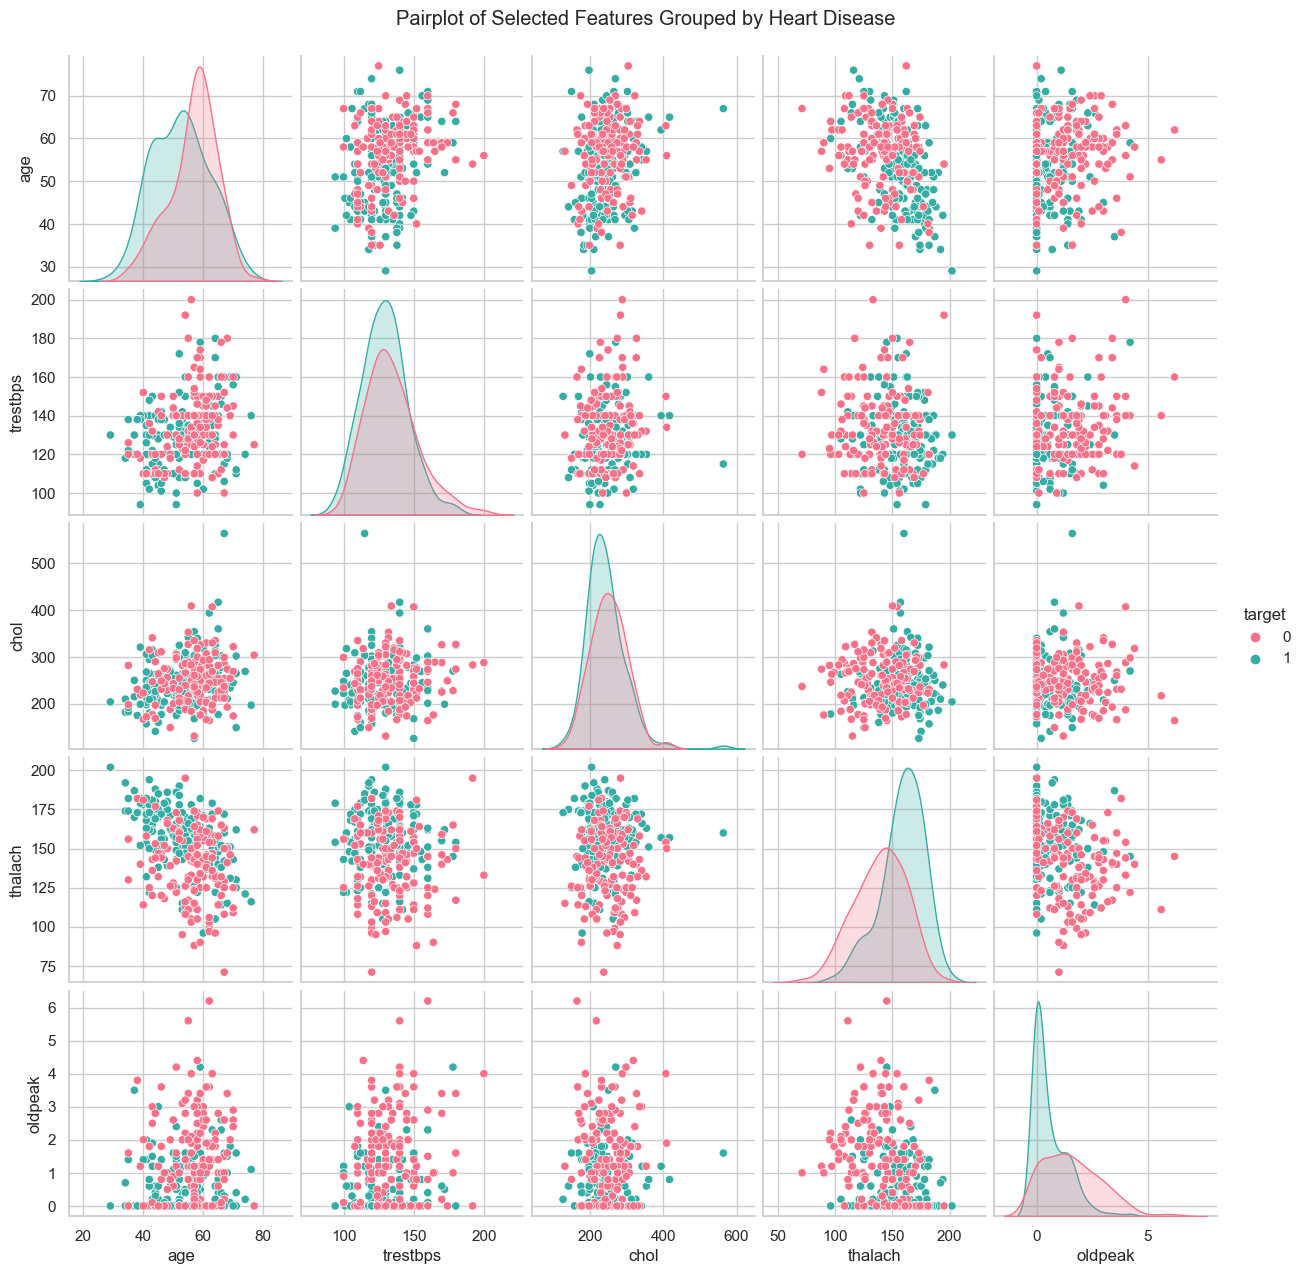

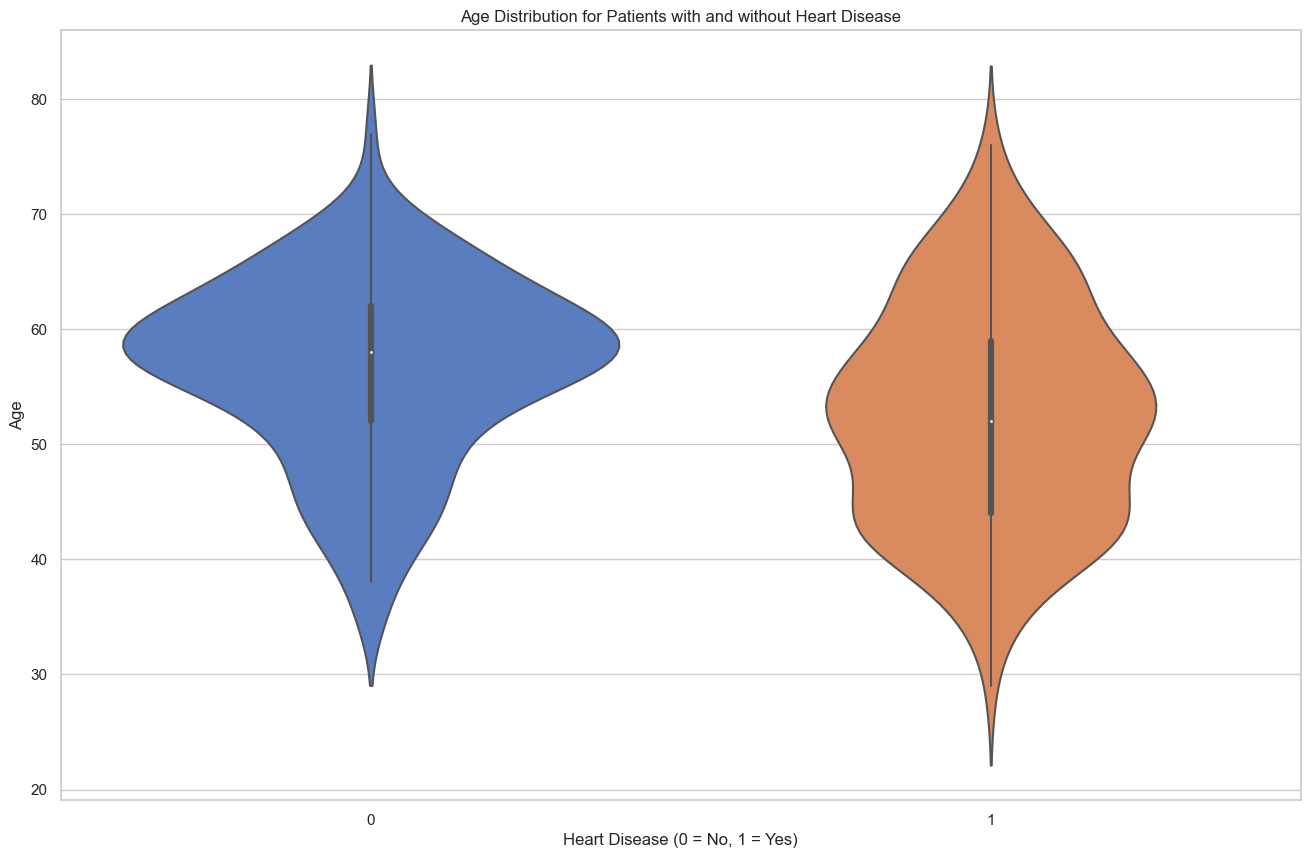

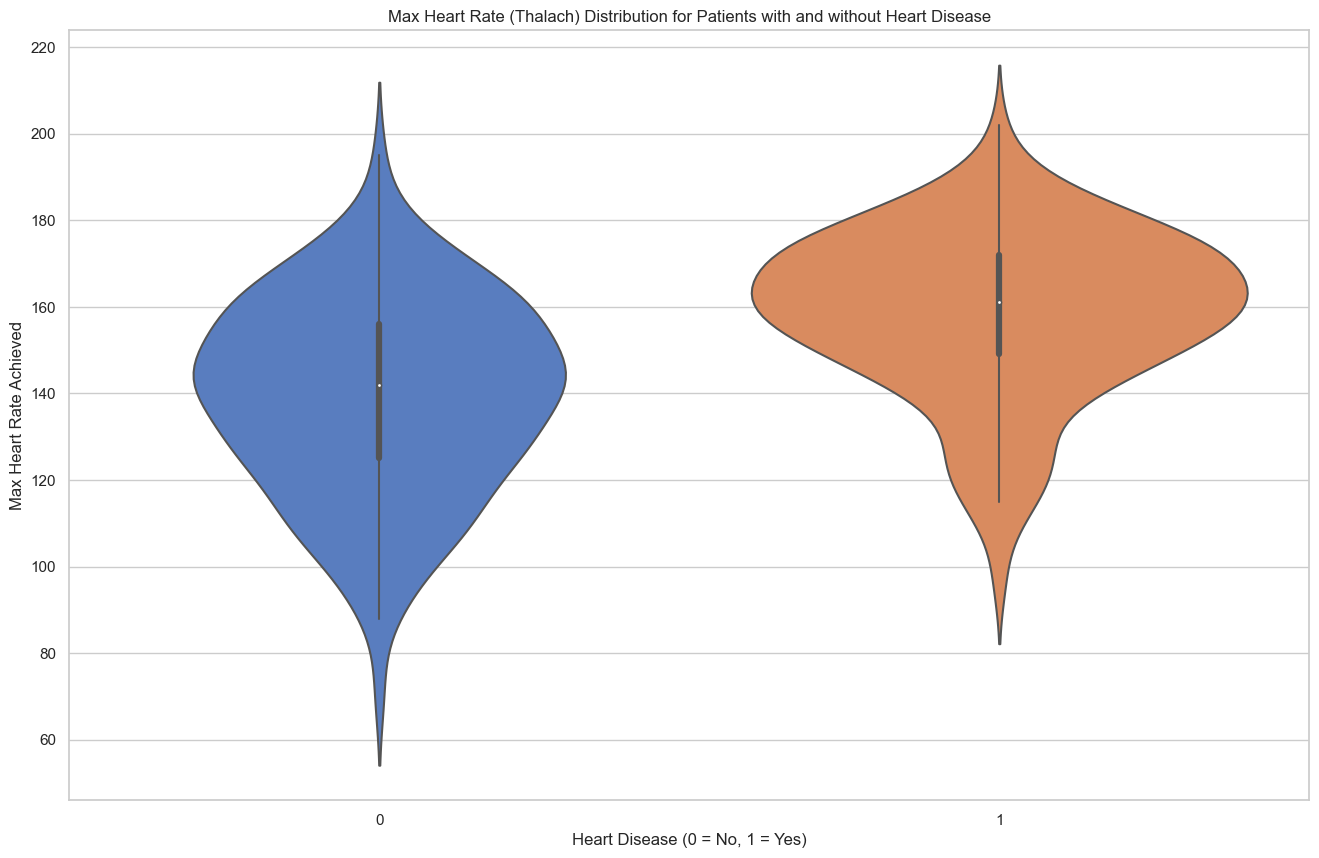

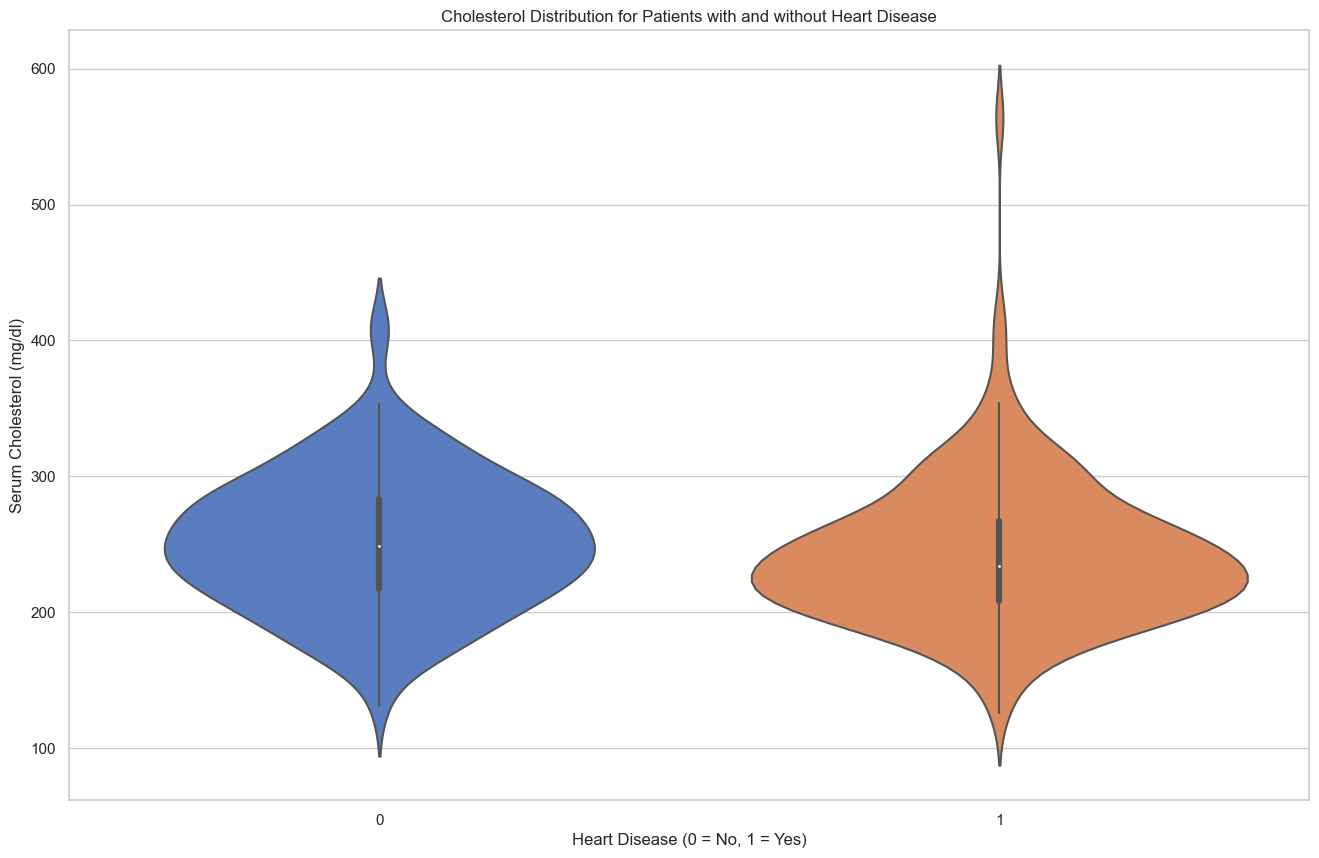

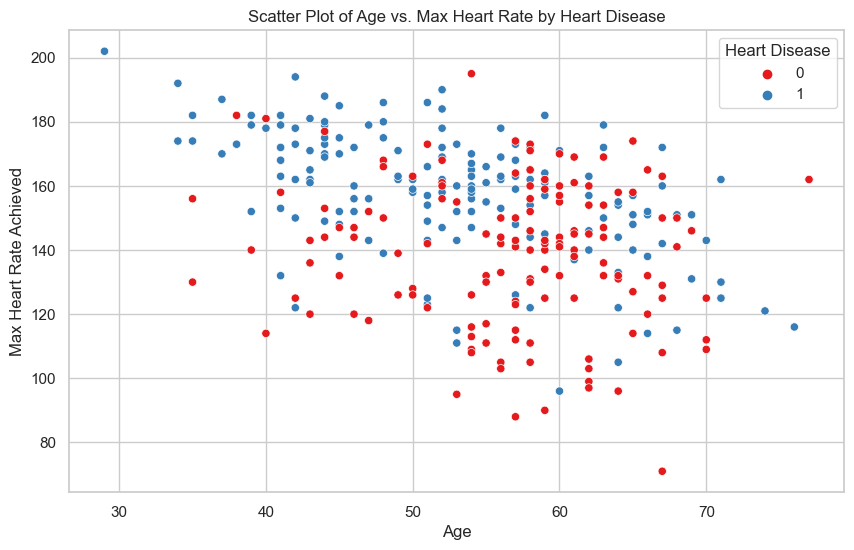

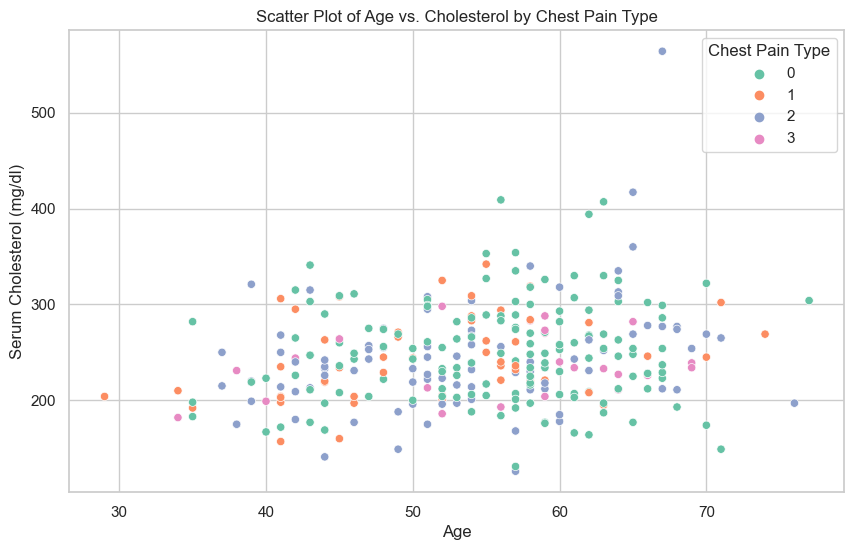

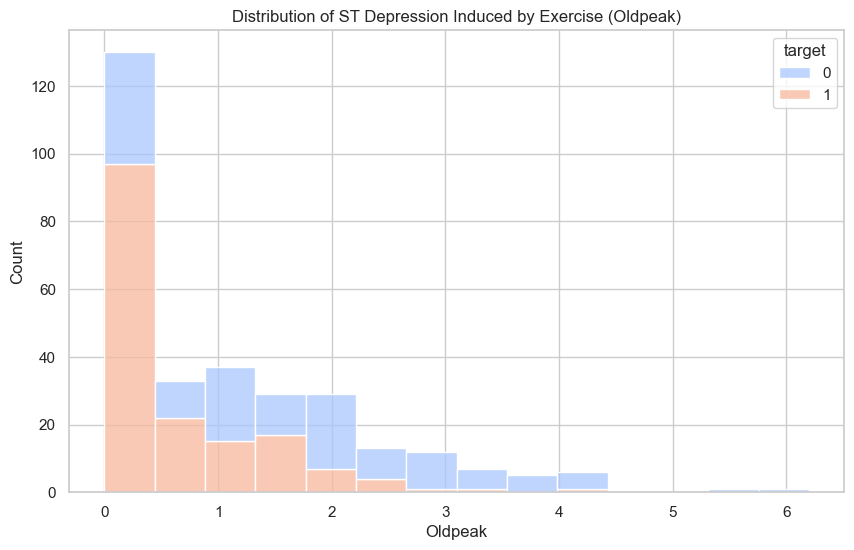

Logistic Regression Confusion Matrix:
[[32  9]
 [ 8 42]]
Accuracy:0.8131868131868132
Decision Tree Confusion Matrix:
[[32  9]
 [15 35]]
Accuracy: 0.7362637362637363


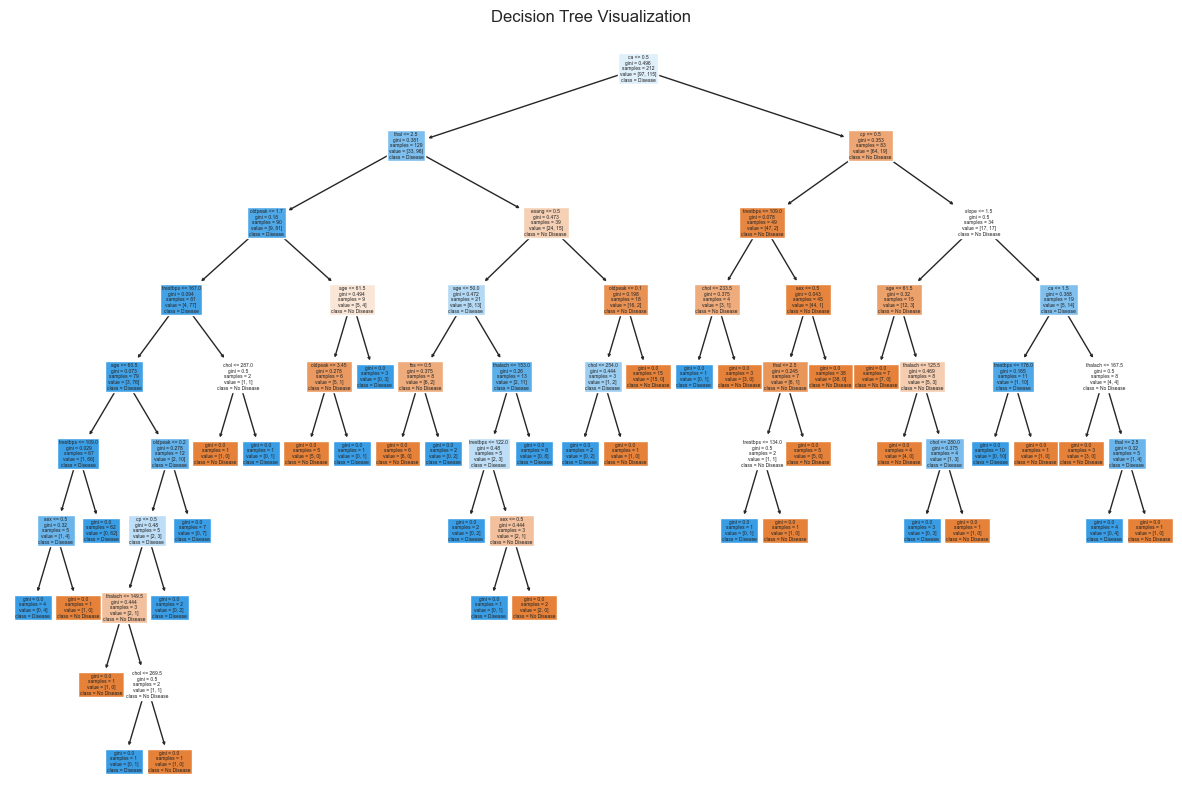

Random Forest Confusion Matrix:
[[33  8]
 [ 8 42]]
Accuracy: 0.8241758241758241


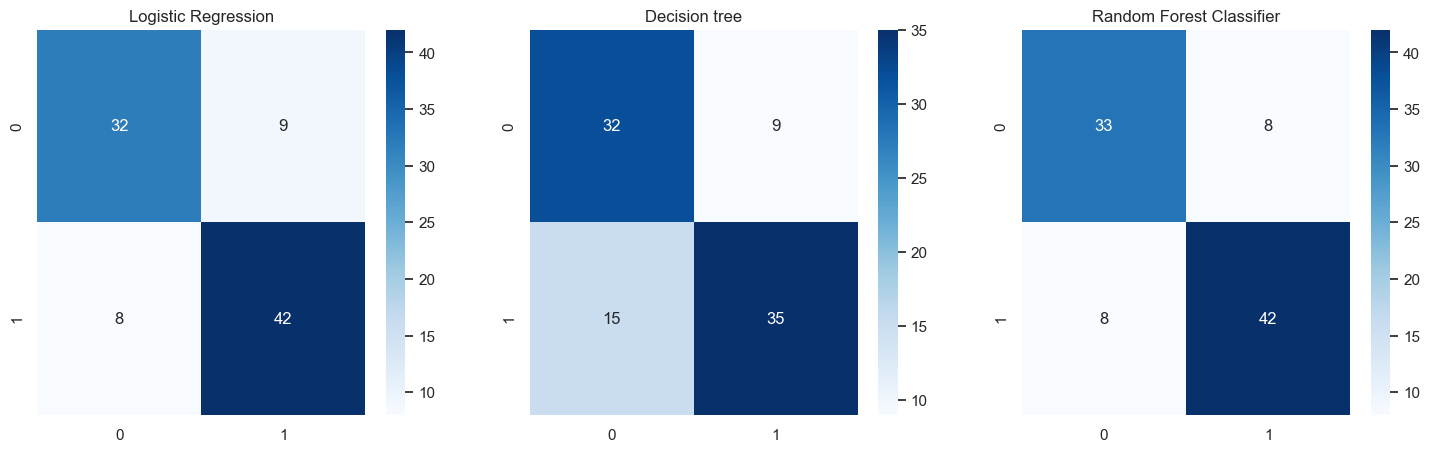

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro

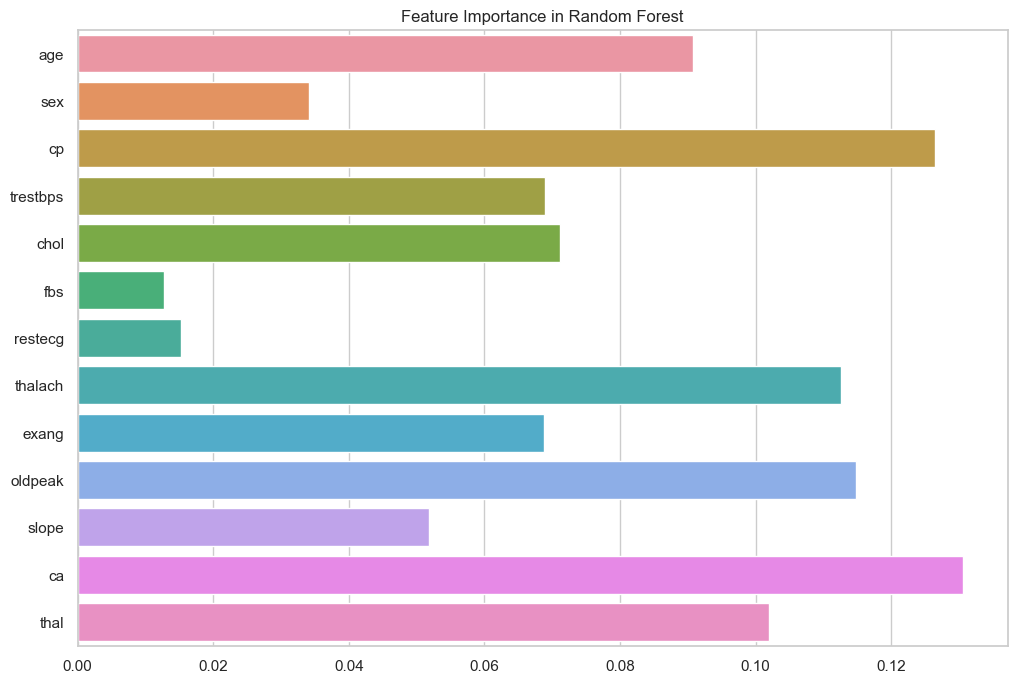

In [1]:
# import all the libraries that are required in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score ,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
# lading dataset into Dataframe
data= pd.read_csv("C:\\Users\\Afiya\\Downloads\\heat disease predictiion\\dataset.csv")
data.head()
# collectingn the information from dataset
data.info()
data.describe().T
data.isnull().sum()
# replace values that are not suitable
data =data.replace('?',np.nan)
data =data.apply(pd.to_numeric)
data = data.fillna(data.median())
# Correlation Analysis
correlation_matrix = data.corr()
print(correlation_matrix)
# visualize the correlation matrix using heat map
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()
# data Visualization

#count of patients with and withoiut heart disease
sns.set(style="whitegrid")  

# Create the countplot
ax = sns.countplot(x='target', data=data, palette='viridis')

# Add total count annotations on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Get the height of each bar (count)
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Set plot titles and labels
plt.title('Number of Patients with Heart Disease (1) vs No Heart Disease (0)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()
# to visualize the age distribution with heart diseases
plt.figure(figsize=(10,6))
sns.histplot(data=data,y='age',x='target',kde=True,bins=3)
plt.title('Age Distribution with Heart Disease')
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()
# Plotting histograms for all numerical features to understand their distributions and spot any potential outliers
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','sex']
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Distribution of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# Boxplots for Outliners 
plt.figure(figsize=(12,8))

sns.boxplot(data=data['age'] ,palette='Set2')
plt.title("Boxplot for outlier Detection in Numerical Features")
plt.xticks(rotation=45)
plt.show()
# Countplot for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig,axs=plt.subplots(4,2,figsize=(18,15))
fig.suptitle('Distribution of Categorical Features', fontsize=16)
axs=axs.flatten()

for i , feature in enumerate(categorical_features):
    sns.countplot(data=data,x=feature,ax=axs[i],palette='Set3')
    axs[i].set_title(f'Count of {feature}')

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()
# Pairplot for the relationship between multiple features
sns.pairplot(data,hue='target',vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],palette='husl')
plt.suptitle('Pairplot of Selected Features Grouped by Heart Disease', y=1.02)
plt.show()
# Violin plot for distribution
plt.figure(figsize=(16, 10))
sns.violinplot(x='target', y='age', data=data, palette='muted')
plt.title('Age Distribution for Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(16, 10))
sns.violinplot(x='target', y='thalach', data=data, palette='muted')
plt.title('Max Heart Rate (Thalach) Distribution for Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate Achieved')
plt.show()

plt.figure(figsize=(16, 10))
sns.violinplot(x='target', y='chol', data=data, palette='muted')
plt.title('Cholesterol Distribution for Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()
# Scatter plot for Age vs. Max Heart Rate (Thalach)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=data, palette='Set1')
plt.title('Scatter Plot of Age vs. Max Heart Rate by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()
# Scatter plot for Age vs. Cholesterol by Chest Pain Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='cp', data=data, palette='Set2')
plt.title('Scatter Plot of Age vs. Cholesterol by Chest Pain Type')
plt.xlabel('Age')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.legend(title='Chest Pain Type', loc='upper right')
plt.show()
# Distribution of oldpeak
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='oldpeak', hue='target', multiple='stack', palette='coolwarm')
plt.title('Distribution of ST Depression Induced by Exercise (Oldpeak)')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()
# Preparin the data
X= data.drop('target',axis=1)
y=data['target']
#Train -Test Split the data (70:30)
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)
y_pred_log = log_model.predict(x_test)

#Confusion Matrix and accuracy
cm_log=confusion_matrix(y_test,y_pred_log)
print(f'Logistic Regression Confusion Matrix:\n{cm_log}')
print(f'Accuracy:{accuracy_score(y_test,y_pred_log)}')
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)

#confusion matrix and accuracy
cm_dt = confusion_matrix(y_test,y_pred_dt)
print(f"Decision Tree Confusion Matrix:\n{cm_dt}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")

from sklearn import tree
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model_dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
cm_rfc =confusion_matrix(y_test,y_pred_rfc)
print(f"Random Forest Confusion Matrix:\n{cm_rfc}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rfc)}")
# Visualization confusion matrix for all models

fig ,ax = plt.subplots(1,3,figsize=(18,5))
sns.heatmap(cm_log,annot=True,fmt='d',cmap='Blues',ax=ax[0])
ax[0].set_title('Logistic Regression')
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues',ax=ax[1])
ax[1].set_title('Decision tree')
sns.heatmap(cm_rfc,annot=True,fmt='d',cmap='Blues',ax=ax[2])
ax[2].set_title('Random Forest Classifier')
plt.show()
# Classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

print('='*100)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print('='*100)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rfc))
# Calculate accuracy, precision, recall, and F1-score for all models
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rfc)

print(f"Logistic Regression Accuracy: {accuracy_log}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")

# Selecting the best model
best_model = max([('Logistic Regression', accuracy_log), ('Decision Tree', accuracy_dt), ('Random Forest', accuracy_rf)], key=lambda x: x[1])
print(f"Best Model: {best_model[0]} with accuracy of {best_model[1]}")
# Visualization for the IMportant Features of Random Forest
feature_importance = rfc.feature_importances_
features =X.columns
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importance,y=features)
plt.title("Feature Importance in Random Forest")
plt.show()

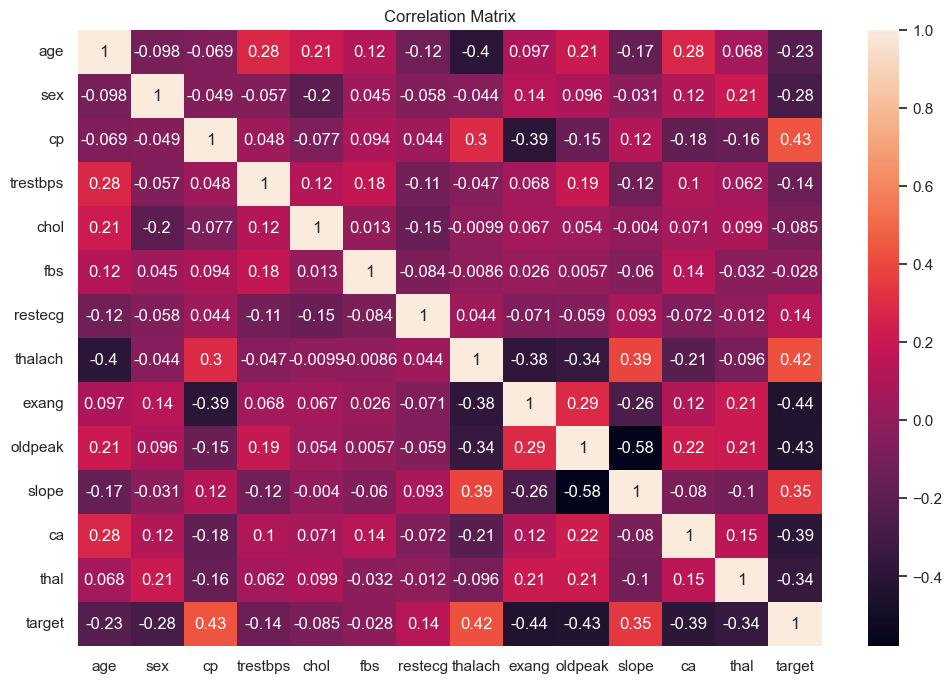

In [2]:
# visualize the correlation matrix using heat map
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

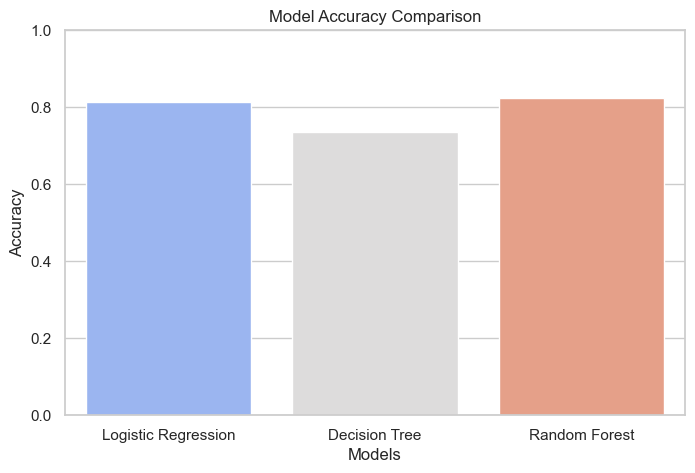

In [5]:
# Calculate accuracy for each model
accuracy_log = accuracy_score(y_test, y_pred_log)  # Logistic Regression Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # Decision Tree Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rfc)  # Random Forest Accuracy

# Bar Chart Visualization
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_log, accuracy_dt, accuracy_rf]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()
